In [48]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [49]:
df_counts = pd.read_csv('./Celltypist/Celltypist_predicted_cell_types_counts.csv')

normalized_counts = df_counts.set_index('Cell Type pred')[['SC', 'ENACT','B2C', 'Xseg']].div(
    df_counts[['SC', 'ENACT','B2C', 'Xseg']].sum()
)
import json

# Create a cell type map by mapping each label to its prefix (before the first underscore)
with open('./Celltypist/cell_type_map_VpX.json', 'r') as f:
    cell_type_map = json.load(f)

# Add a column for the broad/general cell type
df_counts['Broad_Cell_Type'] = df_counts['Cell Type pred'].map(cell_type_map).fillna(df_counts['Cell Type pred'])

# Aggregate the counts by the new broad/general cell types
aggregated_counts = df_counts.groupby('Broad_Cell_Type')[['SC', 'ENACT','B2C', 'Xseg']].sum()

normalized_aggregated = aggregated_counts.div(aggregated_counts.sum())
normalized_aggregated.columns = [f"Celltypist on {col}" for col in normalized_aggregated.columns]
print(normalized_aggregated.head())

                 Celltypist on SC  Celltypist on ENACT  Celltypist on B2C  \
Broad_Cell_Type                                                             
AT1                      0.024520             0.011851           0.007846   
AT2                      0.058077             0.097377           0.093456   
B                        0.051488             0.166552           0.130922   
Basal                    0.004340             0.021379           0.018983   
CD4                      0.163243             0.106763           0.102256   

                 Celltypist on Xseg  
Broad_Cell_Type                      
AT1                        0.003895  
AT2                        0.078738  
B                          0.112757  
Basal                      0.014850  
CD4                        0.094511  


In [53]:
# Load the new dataframe
df_new = pd.read_csv('./Azimuth/azimuth_simplified_proportions.csv')

# Map the cell_type labels to the broad/general cell types using cell_type_map
df_new['Broad_Cell_Type'] = df_new['Cell Type'].map(cell_type_map).fillna(df_new['Cell Type'])

# Set index to Broad_Cell_Type for alignment
df_new_indexed = df_new.set_index('Broad_Cell_Type')

# Append the proportion column to normalized_aggregated
normalized_aggregated['Azimuth on SC'] = df_new_indexed['Proportion']

print(normalized_aggregated.head())

                 Celltypist on SC  Celltypist on ENACT  Celltypist on B2C  \
Broad_Cell_Type                                                             
AT1                      0.024520             0.011851           0.007846   
AT2                      0.058077             0.097377           0.093456   
B                        0.051488             0.166552           0.130922   
Basal                    0.004340             0.021379           0.018983   
CD4                      0.163243             0.106763           0.102256   

                 Celltypist on Xseg  Azimuth on Enact  Sota on Enact  \
Broad_Cell_Type                                                        
AT1                        0.003895          0.005192       0.020719   
AT2                        0.078738          0.014542       0.152599   
B                          0.112757          0.050165       0.389679   
Basal                      0.014850               NaN       0.067158   
CD4                        0

In [54]:
# Load the new dataframe
df_new = pd.read_csv('./Classical Annotation/cell_type_proportions.csv')

# Map the cell_type labels to the broad/general cell types using cell_type_map
df_new['Broad_Cell_Type'] = df_new['cell_type'].map(cell_type_map).fillna(df_new['cell_type'])

# Set index to Broad_Cell_Type for alignment
df_new_indexed = df_new.set_index('Broad_Cell_Type')

# Append the proportion column to normalized_aggregated
normalized_aggregated['Sota on Enact'] = df_new_indexed['proportion']

print(normalized_aggregated.head())

                 Celltypist on SC  Celltypist on ENACT  Celltypist on B2C  \
Broad_Cell_Type                                                             
AT1                      0.024520             0.011851           0.007846   
AT2                      0.058077             0.097377           0.093456   
B                        0.051488             0.166552           0.130922   
Basal                    0.004340             0.021379           0.018983   
CD4                      0.163243             0.106763           0.102256   

                 Celltypist on Xseg  Azimuth on Enact  Sota on Enact  \
Broad_Cell_Type                                                        
AT1                        0.003895          0.005192       0.020719   
AT2                        0.078738          0.014542       0.152599   
B                          0.112757          0.050165       0.389679   
Basal                      0.014850               NaN       0.067158   
CD4                        0

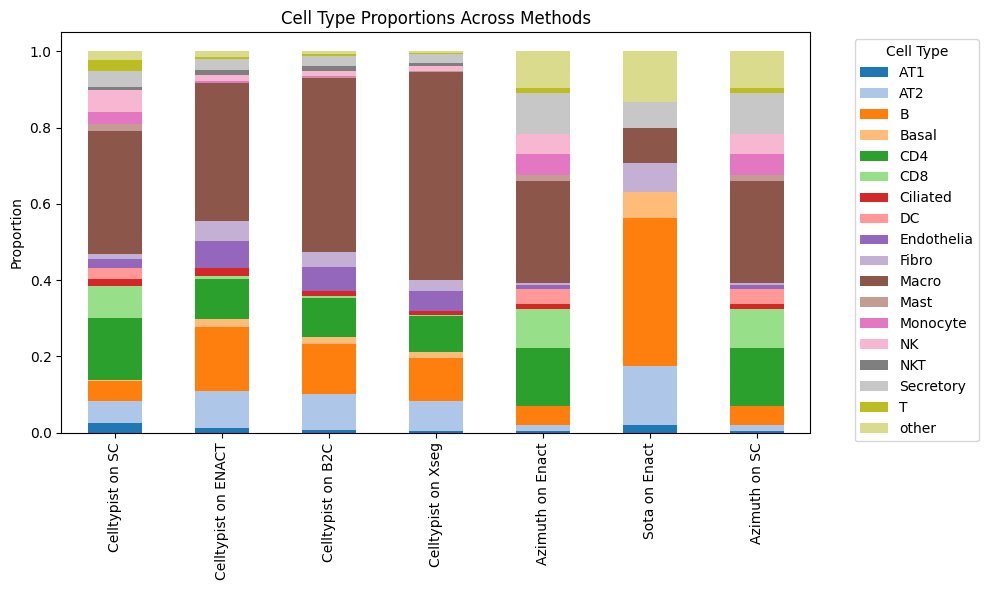

In [55]:
# Plot stacked bar chart for broad cell type proportions
colors = plt.cm.tab20.colors  # Use a colormap with enough distinct colors
cell_types =np.sort(normalized_aggregated.index)
methods = normalized_aggregated.columns

# Assign a color to each cell type
color_map = {cell_type: colors[i % len(colors)] for i, cell_type in enumerate(cell_types)}

ax = normalized_aggregated.T.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=[color_map[ct] for ct in cell_types]
)

plt.ylabel('Proportion')
plt.title('Cell Type Proportions Across Methods')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()